In [1]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
from loguru import logger

from data import (
    create_test_dataset, create_test_dataloader
)
from models import create_model


ds_cfg_fp = 'configs/dataset/suim.yaml'
ds_cfg = yaml.load(open(ds_cfg_fp, 'r'), yaml.FullLoader)
test_ds = create_test_dataset('seg', ds_cfg['test'])
test_dl_cfg = {
    'batch_size': 4,
    'shuffle': True,
    'num_workers': 4,
}
test_dl = create_test_dataloader(test_ds, test_dl_cfg)

# Network config
with open('configs/netowrk/fcn_01.yaml') as f:
    net_cfg = yaml.load(f, yaml.FullLoader)

color_map = ds_cfg['test']['color_map']
colors = ['#'+c for c in sorted(color_map.keys())]

# Set device for pytorch
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

m_cfg = {
    'device': DEVICE,
    'logger': logger,
    'mode': 'test',
    'weights_path': 'checkpoints/seg/fcn/SUIM_02/weights_99.pth',
    'net_cfg': net_cfg,
    'color_map': ds_cfg['test']['color_map']
}
model = create_model('seg', m_cfg)

2023-07-22 11:53:27.914 | INFO     | models.model:setup:71 - Loaded model weights from <checkpoints/seg/fcn/SUIM_02/weights_99.pth>


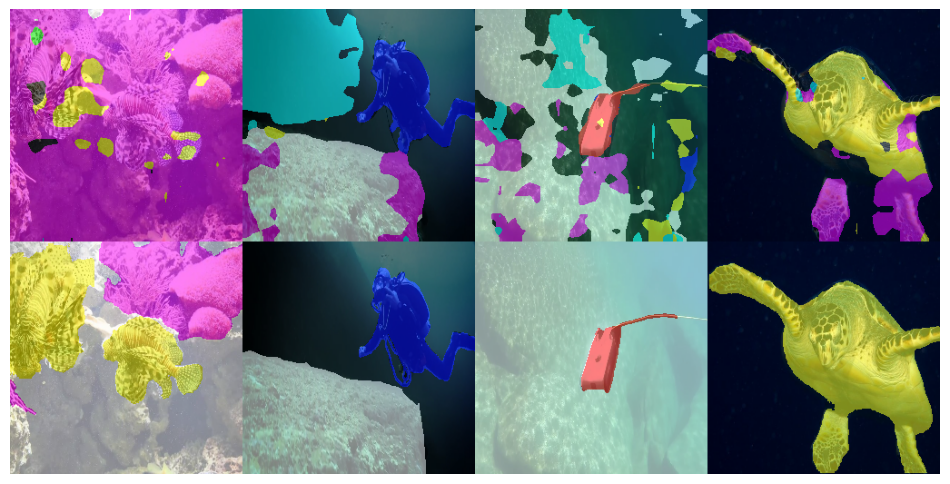

In [2]:
for batch in test_dl:
    full_img, t = model.test(batch)
    plt.figure(figsize=(12,8))
    plt.imshow(full_img)
    plt.axis('off')
    plt.show()
    break

In [5]:
from models.loss import DiceLoss

dice_loss_fn = DiceLoss('micro').to(DEVICE)

for batch in test_dl:
    inp_imgs = batch['img'].to(DEVICE)
    ref_masks = batch['mask'].to(DEVICE)
    pred_masks = model.network(inp_imgs)['out']
    loss_dice = dice_loss_fn(pred_masks, ref_masks)
    print(loss_dice)
    break

tensor(0.1475, device='cuda:0', grad_fn=<MeanBackward0>)
